# Artificial Intelligence Nanodegree
## Machine Translation Project
In this notebook, sections that end with **'(IMPLEMENTATION)'** in the header indicate that the following blocks of code will require additional functionality which you must provide. Please be sure to read the instructions carefully!

## Introduction
In this notebook, you will build a deep neural network that functions as part of an end-to-end machine translation pipeline. Your completed pipeline will accept English text as input and return the French translation.

- **Preprocess** - You'll convert text to sequence of integers.
- **Models** Create models which accepts a sequence of integers as input and returns a probability distribution over possible translations. After learning about the basic types of neural networks that are often used for machine translation, you will engage in your own investigations, to design your own model!
- **Prediction** Run the model on English text.

## Dataset
We begin by investigating the dataset that will be used to train and evaluate your pipeline.  The most common datasets used for machine translation are from [WMT](http://www.statmt.org/).  However, that will take a long time to train a neural network on.  We'll be using a dataset we created for this project that contains a small vocabulary.  You'll be able to train your model in a reasonable time with this dataset.
### Load Data
The data is located in `data/small_vocab_en` and `data/small_vocab_fr`. The `small_vocab_en` file contains English sentences with their French translations in the `small_vocab_fr` file. Load the English and French data from these files from running the cell below.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import helper

# Load English data
english_sentences = helper.load_data('data/small_vocab_en')
# Load French data
french_sentences = helper.load_data('data/small_vocab_fr')

print('Dataset Loaded')

print((english_sentences[1]))
print((french_sentences[1]))

Dataset Loaded
the united states is usually chilly during july , and it is usually freezing in november .
les Ã©tats-unis est gÃ©nÃ©ralement froid en juillet , et il gÃ¨le habituellement en novembre .


### Files
Each line in `small_vocab_en` contains an English sentence with the respective translation in each line of `small_vocab_fr`.  View the first two lines from each file.

In [3]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les Ã©tats-unis est gÃ©nÃ©ralement froid en juillet , et il gÃ¨le habituellement en novembre .


From looking at the sentences, you can see they have been preprocessed already.  The puncuations have been delimited using spaces. All the text have been converted to lowercase.  This should save you some time, but the text requires more preprocessing.
### Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary.  A more complex vocabulary is a more complex problem.  Let's look at the complexity of the dataset we'll be working with.

In [4]:
import collections


english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


For comparison, _Alice's Adventures in Wonderland_ contains 2,766 unique words of a total of 15,500 words.
## Preprocess
For this project, you won't use text data as input to your model. Instead, you'll convert the text into sequences of integers using the following preprocess methods:
1. Tokenize the words into ids
2. Add padding to make all the sequences the same length.

Time to start preprocessing the data...
### Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings.  Since a neural network is a series of multiplication and addition operations, the input data needs to be number(s).

We can turn each character into a number or each word into a number.  These are called character and word ids, respectively.  Character ids are used for character level models that generate text predictions for each character.  A word level model uses word ids that generate text predictions for each word.  Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's [`Tokenizer`](https://keras.io/preprocessing/text/#tokenizer) function. Use this function to tokenize `english_sentences` and `french_sentences` in the cell below.

Running the cell will run `tokenize` on sample data and show output for debugging.

In [5]:
import project_tests as tests
from keras.preprocessing.text import Tokenizer


def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    tokenized_sentences = tokenizer.texts_to_sequences(x)

    return tokenized_sentences, tokenizer

tests.test_tokenize(tokenize)

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

Using TensorFlow backend.


{'study': 4, 'the': 3, 'over': 5, 'my': 6, 'this': 7, 'a': 2, 'brown': 8, 'of': 9, 'lazy': 10, 'lexicography': 11, 'is': 12, 'jove': 13, 'quick': 1, 'by': 14, 'dog': 16, 'jumps': 17, 'short': 18, 'prize': 19, 'sentence': 15, 'fox': 21, 'won': 20}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [3, 1, 8, 21, 17, 5, 3, 10, 16]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [14, 13, 6, 1, 4, 9, 11, 20, 2, 19]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [7, 12, 2, 18, 15]


### Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length.  Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the **end** of each sequence using Keras's [`pad_sequences`](https://keras.io/preprocessing/sequence/#pad_sequences) function.

In [6]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    return pad_sequences(x,padding='post',maxlen=length)

tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [ 3  1  8 21 17  5  3 10 16]
  Output: [ 3  1  8 21 17  5  3 10 16  0]
Sequence 2 in x
  Input:  [14 13  6  1  4  9 11 20  2 19]
  Output: [14 13  6  1  4  9 11 20  2 19]
Sequence 3 in x
  Input:  [ 7 12  2 18 15]
  Output: [ 7 12  2 18 15  0  0  0  0  0]


### Preprocess Pipeline
Your focus for this project is to build neural network architecture, so we won't ask you to create a preprocess pipeline.  Instead, we've provided you with the implementation of the `preprocess` function.

In [7]:
from keras.utils.np_utils import to_categorical

def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    #if preprocess_x.shape[1] > preprocess_y.shape[1]:
    #    preprocess_y = pad(preprocess_y, preprocess_x.shape[1])
    #elif preprocess_x.shape[1] < preprocess_y.shape[1]:
    #    preprocess_x = pad(preprocess_x, preprocess_y.shape[1])

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)
    
    #total_tokens = len(y_tk.word_index) + 1
    #preprocess_y = np.array([to_categorical(preprocess_y[i],total_tokens) for i in range(len(preprocess_y))])

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)

print('Data Preprocessed')

Data Preprocessed


In [8]:
print(preproc_english_sentences[1])
print(preproc_french_sentences[1])

[ 5 21 20  1  9 62  4 43  7  3  1  9 51  2 45]
[[ 4]
 [32]
 [31]
 [ 1]
 [12]
 [19]
 [ 2]
 [49]
 [ 6]
 [ 3]
 [95]
 [69]
 [ 2]
 [51]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]


## Models
In this section, you will experiment with various neural network architectures.
You will begin by training four relatively simple architectures.
- Model 1 is a simple RNN
- Model 2 is a RNN with Embedding
- Model 3 is a Bidirectional RNN
- Model 4 is an optional Encoder-Decoder RNN

After experimenting with the four simple architectures, you will construct a deeper architecture that is designed to outperform all four models.
### Ids Back to Text
The neural network will be translating the input to words ids, which isn't the final form we want.  We want the French translation.  The function `logits_to_text` will bridge the gab between the logits from the neural network to the French translation.  You'll be using this function to better understand the output of the neural network.

In [9]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


### Model 1: RNN (IMPLEMENTATION)
![RNN](images/rnn.png)
A basic RNN model is a good baseline for sequence data.  In this model, you'll build a RNN that translates English to French.

In [10]:
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))
print(tmp_x.shape)

(137861, 21, 1)


In [11]:
from keras.layers import GRU, Input, Dense, TimeDistributed, LSTM
from keras.models import Model, Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size, learning_rate=0.1):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the layers
    model = Sequential()
    model.add(LSTM(output_sequence_length, input_shape=input_shape[1:], return_sequences=True))
    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

tests.test_simple_model(simple_model)

# Train the neural network
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1, # Add a code for padding
    len(french_tokenizer.word_index) + 1,
    learning_rate=0.005 # Lowered learning rate for better fit
)

print(simple_rnn_model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 21, 21)            1932      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 21, 346)           7612      
Total params: 9,544.0
Trainable params: 9,544
Non-trainable params: 0.0
_________________________________________________________________
None


In [12]:
print(preproc_french_sentences.shape)

from keras.callbacks import EarlyStopping

simple_rnn_model.fit(
    tmp_x, 
    preproc_french_sentences, 
    batch_size=36762, epochs=10, validation_split=0.2#,
    #callbacks = [EarlyStopping(monitor='val_acc', patience=3, mode='max')]
)

(137861, 21, 1)
Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 3s - loss: 9.3310 - acc: 0.1657 - val_loss: 7.3906 - val_acc: 0.3982
Epoch 2/10
110288/110288 [==============================] - 2s - loss: 7.1337 - acc: 0.4236 - val_loss: 6.6490 - val_acc: 0.4485
Epoch 3/10
110288/110288 [==============================] - 2s - loss: 6.5912 - acc: 0.4478 - val_loss: 6.4698 - val_acc: 0.4456
Epoch 4/10
110288/110288 [==============================] - 2s - loss: 6.4256 - acc: 0.4417 - val_loss: 6.3727 - val_acc: 0.4299
Epoch 5/10
110288/110288 [==============================] - 2s - loss: 6.3669 - acc: 0.4265 - val_loss: 6.3718 - val_acc: 0.4281
Epoch 6/10
110288/110288 [==============================] - 2s - loss: 6.3668 - acc: 0.4269 - val_loss: 6.3526 - val_acc: 0.4288
Epoch 7/10
110288/110288 [==============================] - 2s - loss: 6.3467 - acc: 0.4288 - val_loss: 6.3145 - val_acc: 0.4316
Epoch 8/10
110288/110288 [====

In [13]:
# Print prediction(s)

def preview_sentence(sentence_index,input_x,model):
    print(model.predict(input_x[sentence_index:sentence_index+1]).shape)
    print('ENGLISH: ',english_sentences[sentence_index])
    print('FRENCH: ',
        logits_to_text(
            model.predict(input_x[sentence_index:sentence_index+1])[0],
            french_tokenizer
        )
    )
    pass

preview_sentence(13,tmp_x,simple_rnn_model)

print(tmp_x[0][0])

print()

(1, 21, 346)
ENGLISH:  that cat was my most loved animal .
FRENCH:  est est est est est est est <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
[17]



### Model 2: Embedding (IMPLEMENTATION)
![RNN](images/embedding.png)
You've turned the words into ids, but there's a better representation of a word.  This is called word embeddings.  An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents the size of the embedding vectors.

In this model, you'll create a RNN model using embedding.

In [14]:
from keras.layers.embeddings import Embedding


def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    model = Sequential()
    model.add(Embedding(
        input_length = input_shape[1],
        input_dim=english_vocab_size,
        output_dim = french_vocab_size
    ))
    
    model.add(LSTM(
        output_sequence_length,
        input_shape = input_shape[1:],
        return_sequences = True           
    ))
    
    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.summary()

    model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

    return model

tests.test_embed_model(embed_model)

# TODO: Reshape the input
max_length = max(preproc_english_sentences.shape[1],preproc_french_sentences.shape[1])
padded_x = pad(preproc_english_sentences, max_length)

embed_rnn = embed_model(
    padded_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 344)           68456     
_________________________________________________________________
lstm_3 (LSTM)                (None, 21, 21)            30744     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 21, 344)           7568      
Total params: 106,768.0
Trainable params: 106,768
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 346)           69200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 21, 21)            30912     
_________________________________________________________________


In [15]:
# TODO: Train the neural network
embed_rnn.fit(
    padded_x,preproc_french_sentences,
    batch_size=36762, epochs=10, validation_split=0.2#,
    #callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
)


Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 4s - loss: 6.9773 - acc: 0.1388 - val_loss: 4.9587 - val_acc: 0.4400
Epoch 2/10
110288/110288 [==============================] - 3s - loss: 4.7186 - acc: 0.4548 - val_loss: 4.2006 - val_acc: 0.4922
Epoch 3/10
110288/110288 [==============================] - 3s - loss: 4.0801 - acc: 0.4955 - val_loss: 3.7161 - val_acc: 0.4973
Epoch 4/10
110288/110288 [==============================] - 3s - loss: 3.6390 - acc: 0.4997 - val_loss: 3.4075 - val_acc: 0.5080
Epoch 5/10
110288/110288 [==============================] - 3s - loss: 3.3505 - acc: 0.5071 - val_loss: 3.1352 - val_acc: 0.5081
Epoch 6/10
110288/110288 [==============================] - 3s - loss: 3.0756 - acc: 0.5068 - val_loss: 2.8721 - val_acc: 0.5037
Epoch 7/10
110288/110288 [==============================] - 3s - loss: 2.8244 - acc: 0.5018 - val_loss: 2.6733 - val_acc: 0.5002
Epoch 8/10
110288/110288 [====================

In [16]:
# TODO: Print prediction(s)
preview_sentence(5,padded_x,embed_rnn)

(1, 21, 346)
ENGLISH:  his favorite fruit is the orange , but my favorite is the grape .
FRENCH:  est fruit est est est est est mon il est est <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Model 3: Bidirectional RNNs (IMPLEMENTATION)
![RNN](images/bidirectional.png)
One restriction of a RNN is that it can't see the future input, only the past.  This is where bidirectional recurrent neural networks come in.  They are able to see the future data.

In [17]:
from keras.layers import Bidirectional


def bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a bidirectional RNN model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    model = Sequential()
    model.add(
        Bidirectional(
            LSTM(
                output_sequence_length,
                return_sequences=True
            ),
            input_shape=input_shape[1:],
            merge_mode='sum'
        )
    )

    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    model.summary()

    return model

tests.test_bd_model(bd_model)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 21, 21)            3864      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 21, 344)           7568      
Total params: 11,432.0
Trainable params: 11,432
Non-trainable params: 0.0
_________________________________________________________________


In [18]:

bd_rnn = bd_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 21, 21)            3864      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 21, 346)           7612      
Total params: 11,476.0
Trainable params: 11,476
Non-trainable params: 0.0
_________________________________________________________________


In [19]:
# TODO: Train and Print prediction(s)
bd_rnn.fit(tmp_x, preproc_french_sentences,
    batch_size=36762, epochs=20, validation_split=0.2#,
    #callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
)

Train on 110288 samples, validate on 27573 samples
Epoch 1/20
110288/110288 [==============================] - 4s - loss: 13.8376 - acc: 0.0063 - val_loss: 10.7785 - val_acc: 0.0071
Epoch 2/20
110288/110288 [==============================] - 3s - loss: 10.3282 - acc: 0.0073 - val_loss: 9.1949 - val_acc: 0.0085
Epoch 3/20
110288/110288 [==============================] - 3s - loss: 9.0180 - acc: 0.0098 - val_loss: 8.5760 - val_acc: 0.0191
Epoch 4/20
110288/110288 [==============================] - 3s - loss: 8.4775 - acc: 0.0262 - val_loss: 8.1907 - val_acc: 0.0747
Epoch 5/20
110288/110288 [==============================] - 3s - loss: 8.1088 - acc: 0.1015 - val_loss: 7.8679 - val_acc: 0.1768
Epoch 6/20
110288/110288 [==============================] - 3s - loss: 7.8118 - acc: 0.2033 - val_loss: 7.6009 - val_acc: 0.2928
Epoch 7/20
110288/110288 [==============================] - 3s - loss: 7.5466 - acc: 0.3203 - val_loss: 7.3448 - val_acc: 0.3677
Epoch 8/20
110288/110288 [=================

In [20]:
preview_sentence(3,tmp_x,bd_rnn)

(1, 21, 346)
ENGLISH:  the united states is sometimes mild during june , and it is cold in september .
FRENCH:  la en en <PAD> <PAD> en <PAD> en <PAD> <PAD> <PAD> <PAD> <PAD> en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Model 4: Encoder-Decoder (OPTIONAL)
Time to look at encoder-decoder models.  This model is made up of an encoder and decoder. The encoder creates a matrix representation of the sentence.  The decoder takes this matrix as input and predicts the translation as output.

Create an encoder-decoder model in the cell below.

In [21]:
from keras.layers import RepeatVector


def encdec_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # OPTIONAL: Implement
    model = Sequential()

    model.add(GRU(256,input_shape=input_shape[1:]))

    model.add(RepeatVector(output_sequence_length))

    model.add(GRU(256,input_shape=input_shape[1:], return_sequences = True))

    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    model.summary()

    return model

tests.test_encdec_model(encdec_model)


# OPTIONAL: Train and Print prediction(s)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 256)               198144    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 21, 256)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 21, 256)           393984    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 21, 344)           88408     
Total params: 680,536.0
Trainable params: 680,536.0
Non-trainable params: 0.0
_________________________________________________________________


### Model 5: Custom (IMPLEMENTATION)
Use everything you learned from the previous models to create a model that incorporates embedding and a bidirectional rnn into one model.

In [22]:
import project_tests as tests

def model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a model that incorporates embedding, encoder-decoder, and bidirectional RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """

    model = Sequential()

    model.add(Embedding(
        input_length = input_shape[1],
        input_dim=english_vocab_size,
        output_dim = french_vocab_size
    ))
    
    # TODO: Implement encoder
    #model.add(GRU(input_shape[1]))
    #model.add(RepeatVector(output_sequence_length))

    model.add(
        Bidirectional(
            GRU(
                256,
                return_sequences=True
            ),
            merge_mode='sum'
        )
    )

    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(
        loss=sparse_categorical_crossentropy,
        optimizer=Adam(),
        metrics=['accuracy']
    )

    model.summary()

    return model

#tests.test_model_final(model_final) # Test will fail without encoder-decoder

print('Final Model Loaded')

final_rnn = model_final(
    padded_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1
)

Final Model Loaded
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 21, 346)           69200     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 21, 256)           926208    
_________________________________________________________________
time_distributed_8 (TimeDist (None, 21, 346)           88922     
Total params: 1,084,330.0
Trainable params: 1,084,330
Non-trainable params: 0.0
_________________________________________________________________


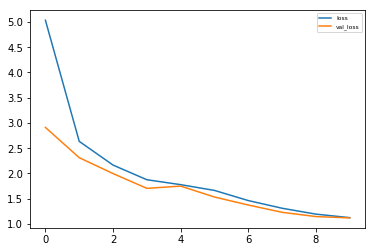

110288/110288 [==============================] - 8s - loss: 1.1241 - acc: 0.6631 - val_loss: 1.1190 - val_acc: 0.6602


In [23]:
# This is a test run, full training below
import keras.callbacks

from matplotlib import pyplot as plt
from IPython.display import clear_output

# CODE FROM https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend(prop={'size': 6})
        plt.show();

        
history = final_rnn.fit(
    padded_x, preproc_french_sentences,    
    batch_size=10000, epochs=10, validation_split=0.2,
    callbacks=[PlotLosses()]
)


In [24]:
preview_sentence(3,padded_x,final_rnn)

(1, 21, 346)
ENGLISH:  the united states is sometimes mild during june , and it is cold in september .
FRENCH:  les aux printemps est parfois doux en juin juin il est froid en septembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


## Prediction (IMPLEMENTATION)

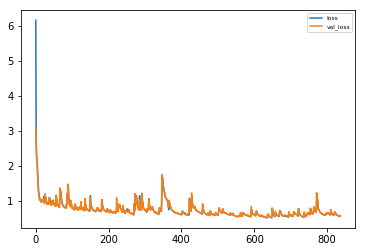

Epoch 00836: loss did not improve
110288/110288 [==============================] - 11s - loss: 0.5627 - acc: 0.7473 - val_loss: 0.5807 - val_acc: 0.7434
Sample 1:
il a vu un la camion brillant <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Il a vu un vieux camion jaune
Sample 2:
new jersey est parfois calme en automne et il il il en en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [26]:
import numpy as np
import os.path
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.sequence import pad_sequences

def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """
    # TODO: Train neural network using model_final
    x = pad(x,y.shape[1])

    model = model_final(
        padded_x.shape,
        y.shape[1],
        len(x_tk.word_index) + 1,
        len(y_tk.word_index) + 1
    )
    
    weight_path = 'weights.model_final5.hdf5'

    checkpointer = ModelCheckpoint(
        filepath=weight_path,
        save_best_only=True,
        monitor='loss',
        verbose=1
    )

    earlystopper = EarlyStopping(
        min_delta=0.001,
        patience=200,
        #verbose=1,
        monitor='loss'
    )

    model.fit(
        x,y,
        validation_split=0.2,
        batch_size=10000, # Push as much data as possible per batch as our GPU can handle. This is 1/3 of all training data.
        epochs=10000,
        callbacks=[PlotLosses(),checkpointer,earlystopper]
    )

    model.load_weights(weight_path) # Reload best weights

    ## DON'T EDIT ANYTHING BELOW THIS LINE
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'he saw a old yellow truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.argmax(x)] for x in y[0]]))


final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)

## Submission
When you are ready to submit your project, do the following steps:
1. Ensure you pass all points on the [rubric](https://review.udacity.com/#!/rubrics/1004/view).
2. Submit the following in a zip file.
  - `helper.py`
  - `machine_translation.ipynb`
  - `machine_translation.html`
    - You can export the notebook by navigating to **File -> Download as -> HTML (.html)**.